**ANALISIS EXPLORATORIO Y CURACION DE DATOS**

1º entrega

---

**Grupo Nº25**

_Integrantes:_

- Dimari Franco

- Genovese Juan Cruz

- López Eduardo

- Pérez Lucas

In [7]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import seaborn as sb
import plotly
import sqlalchemy
from sqlalchemy import create_engine, MetaData, Table, Column, Integer, String, Float, text, select, Text
from sqlalchemy.orm import sessionmaker
from matplotlib.ticker import FuncFormatter



sb.set_context('talk')

**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2024*

----

# Trabajo práctico entregable - parte 1

En esta notebook, vamos a cargar el conjunto de datos de [la compentencia Kaggle](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot) sobre estimación de precios de ventas de propiedades en Melbourne, Australia.

Utilizaremos el conjunto de datos reducido producido por [DanB](https://www.kaggle.com/dansbecker). Hemos subido una copia a un servidor de la Universidad Nacional de Córdoba para facilitar su acceso remoto.

In [8]:
melb_df = pd.read_csv(
    './ArchivosCSV/melb_data.csv')

melb_df[:5]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [9]:
interesting_cols = [
  'description', 'neighborhood_overview',
  'street', 'neighborhood', 'city', 'suburb', 'state', 'zipcode',
  'price', 'weekly_price', 'monthly_price',
  'latitude', 'longitude',
]

airbnb_df = pd.read_csv(
  './ArchivosCSV/cleansed_listings_dec18.csv',
  usecols = interesting_cols
)

C:\Users\juanc\AppData\Local\Temp\ipykernel_12160\379606573.py:8: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  airbnb_df = pd.read_csv(


## Ejercicio 1 SQL:

1. Crear una base de datos en SQLite utilizando la libreria SQLalchemy.

2. Ingestar los datos provistos en 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv' en una tabla y el dataset generado en clase con datos de airbnb y sus precios por codigo postal en otra.

3. Implementar consultas en SQL que respondan con la siguiente información:

    - cantidad de registros totales por ciudad.
    - cantidad de registros totales por barrio y ciudad.

4. Combinar los datasets de ambas tablas ingestadas utilizando el comando JOIN de SQL  para obtener un resultado similar a lo realizado con Pandas en clase.  


In [10]:
#Se crea la BDD
engine = create_engine('sqlite:///melb_data.db') # Crea una conexion a la BDD
metadata = MetaData() # Se utiliza para manejar la estructura de la BDD

##### BDD de melb_data.csv

In [11]:
melb_df['postcode_int'] = pd.to_numeric(melb_df.Postcode, errors='coerce').fillna(0).astype(int)
#Se guarda el archivo CSV en un tabla dentro de la BDD
melb_df.to_sql(
    'melb_data', #Nombre de la tabla
    con = engine, #Especifica a qué BDD se va a conectar
    if_exists='replace',
    index=False
)

13580

In [12]:
query_por_region = """
SELECT Regionname, COUNT(*) AS registros_totales
FROM melb_data
GROUP BY Regionname;
"""


df_total_por_region = pd.read_sql_query(
    query_por_region,
    con=engine
)


print("Cantidad de registros totales por Región:")
print(df_total_por_region)


Cantidad de registros totales por Región:
                   Regionname  registros_totales
0        Eastern Metropolitan               1471
1            Eastern Victoria                 53
2       Northern Metropolitan               3890
3           Northern Victoria                 41
4  South-Eastern Metropolitan                450
5       Southern Metropolitan               4695
6        Western Metropolitan               2948
7            Western Victoria                 32


In [13]:
query_por_suburbio = """
SELECT Suburb, COUNT(*) AS registros_totales
FROM melb_data
GROUP BY Suburb;
"""


df_total_por_suburbio = pd.read_sql_query(
    query_por_suburbio,
    con=engine
)


print("Cantidad de registros totales por Suburbio:")
print(df_total_por_suburbio)


Cantidad de registros totales por Suburbio:
           Suburb  registros_totales
0      Abbotsford                 56
1      Aberfeldie                 44
2    Airport West                 67
3       Albanvale                  6
4     Albert Park                 69
..            ...                ...
309    Wonga Park                  1
310  Wyndham Vale                  4
311     Yallambie                 24
312    Yarra Glen                  1
313    Yarraville                164

[314 rows x 2 columns]


##### BDD de AirBNB

In [14]:
airbnb_df['zipcode_int'] = pd.to_numeric(airbnb_df.zipcode, errors='coerce').fillna(0).astype(int)
airbnb_df.to_sql(
    'airbnb_data', #Nombre de la tabla
    con=engine, #Especifica a qué BDD se va a conectar
    if_exists='replace', #Si ya existe la tabla, se reemplaza con los datos nuevos
    index=False
)

22895

In [15]:
query_por_ciudad_airbnb = """
SELECT city, COUNT(*) AS registros_totales
FROM airbnb_data
GROUP BY city;
"""


df_total_por_ciudad = pd.read_sql_query(
    query_por_ciudad_airbnb,
    con=engine
)


print("Cantidad de registros totales por ciudad:")
print(df_total_por_ciudad)

Cantidad de registros totales por ciudad:
                 city  registros_totales
0             Banyule                203
1             Bayside                375
2          Boroondara                664
3            Brimbank                108
4            Cardinia                123
5               Casey                153
6             Darebin                698
7           Frankston                177
8           Glen Eira                631
9   Greater Dandenong                147
10        Hobsons Bay                239
11               Hume                170
12           Kingston                309
13               Knox                175
14         Manningham                313
15        Maribyrnong                436
16          Maroondah                115
17          Melbourne               7368
18             Melton                 95
19             Monash                571
20      Moonee Valley                344
21           Moreland                967
22          Nil

In [16]:
query_por_barrio_ciudad_airbnb = """
SELECT city, neighborhood, COUNT(*) AS registros_totales
FROM airbnb_data
GROUP BY city, neighborhood;
"""


df_por_barrio_ciudad = pd.read_sql_query(
    query_por_barrio_ciudad_airbnb,
    con=engine
)


print("\nCantidad de registros totales por barrio y ciudad:")
print(df_por_barrio_ciudad)


Cantidad de registros totales por barrio y ciudad:
             city   neighborhood  registros_totales
0         Banyule           None                174
1         Banyule     Alphington                 16
2         Banyule        Preston                  8
3         Banyule      Thornbury                  5
4         Bayside           None                170
..            ...            ...                ...
129         Yarra        Fitzroy                381
130         Yarra  Fitzroy North                225
131         Yarra      Northcote                  6
132         Yarra       Richmond                547
133  Yarra Ranges           None                771

[134 rows x 3 columns]


##### JOIN

In [17]:
print("Suburbio")
print("")
print("Tipo de datos de la columna Suburb en melb_data:", melb_df.Suburb.dtype)
print("Tipo de datos de la columna suburb en airbnb_data:", airbnb_df.suburb.dtype)
print("")
print("")
print("")
print("Codigo postal")
print("")
print("Tipo de datos de la columna postcode en melb_data:", melb_df.postcode_int.dtype)
print("Tipo de datos de la columna zipcode en airbnb_data:", airbnb_df.zipcode_int.dtype)

Suburbio

Tipo de datos de la columna Suburb en melb_data: object
Tipo de datos de la columna suburb en airbnb_data: object



Codigo postal

Tipo de datos de la columna postcode en melb_data: int32
Tipo de datos de la columna zipcode en airbnb_data: int32


In [18]:
#Analisis de conveniencia por Suburbio
melb_suburbs = melb_df.Suburb.astype(str).values
airbnb_suburbs = airbnb_df.suburb.astype(str).values

intersection = np.intersect1d(
    melb_suburbs,
    airbnb_suburbs,
    assume_unique=False
)

print("Suburbios totales en melb_data:", len(melb_df.Suburb.unique()))
print("Suburbios totales en airbnb_data:", len(airbnb_df.suburb.unique()))
print("Suburbios en común:", len(intersection))

Suburbios totales en melb_data: 314
Suburbios totales en airbnb_data: 543
Suburbios en común: 296


In [19]:
#Analisis de conveniencia por Codigo postal
intersection = np.intersect1d(
    melb_df.postcode_int,
    airbnb_df.zipcode_int,
    assume_unique=False
)

print("CP totales en melb_data:", len(melb_df.postcode_int.unique()))
print("CP totales en airbnb_data:", len(airbnb_df.zipcode_int.unique()))
print("CP en común:", len(intersection))

CP totales en melb_data: 198
CP totales en airbnb_data: 248
CP en común: 191


Luego de este analisis se puede concluir que es mas conveniente tomar las columnas referentes al codigo postal ya que de lo contrario se podrian relacionar menos columnas entre si

In [20]:
#airbnb

query_precios="""
SELECT zipcode_int CodigoPostal,
COUNT(*) Cantidad,

AVG(price) PrecioDiario,
AVG(weekly_price) PrecioSemanal,
AVG(monthly_price) PrecioMensual

FROM airbnb_data a

WHERE a.zipcode_int > 0
GROUP BY zipcode_int
ORDER BY 2 desc
"""


with engine.connect() as con:
      rs = con.execute(text(query_precios))
      df_precios=pd.DataFrame(rs.fetchall())

print(df_precios)

     CodigoPostal  Cantidad  PrecioDiario  PrecioSemanal  PrecioMensual
0            3000      3367    150.504307     918.738956    3407.204651
1            3006      1268    188.851735    1239.827273    4358.556701
2            3182      1135    147.729515    1051.441026    3847.400000
3            3141       881    157.912599    1040.403670    3417.811111
4            3004       728    158.271978    1061.171429    3759.925926
..            ...       ...           ...            ...            ...
242          3200         1     40.000000            NaN            NaN
243          3096         1    100.000000     250.000000    1500.000000
244          2582         1    104.000000            NaN            NaN
245          2134         1     50.000000            NaN            NaN
246          2010         1     40.000000            NaN            NaN

[247 rows x 5 columns]


In [21]:
#Airbnb
#Guardamos df_precios en SQLite
df_precios.to_sql(
      'precios_data',
      con=engine,
      if_exists="replace"
)

247

In [22]:
#Combinamos las tablas precios_data con melb_data
query_precios_join_melb="""
SELECT

a.postcode_int,
a.Suburb,
a.Price,
a.Distance,
a.Regionname,
Bedroom2,
Bathroom,
BuildingArea,
b.PrecioDiario,
b.PrecioSemanal,
b.PrecioMensual,
b.Cantidad

FROM melb_data a LEFT JOIN precios_data b

ON b.CodigoPostal=a.postcode_int
ORDER BY Cantidad desc
"""


with engine.connect() as con:
      precios_join_melb = con.execute(text(query_precios_join_melb))
      df_precios_join = pd.DataFrame( precios_join_melb.fetchall())

df_precios_join

,postcode_int,Suburb,Price,Distance,Regionname,Bedroom2,Bathroom,BuildingArea,PrecioDiario,PrecioSemanal,PrecioMensual,Cantidad
0,3000,Melbourne,427000.0,2.8,Northern Metropolitan,1.0,1.0,NaN,150.504307,918.738956,3407.204651,3367.0
1,3000,Melbourne,1160500.0,2.8,Northern Metropolitan,2.0,2.0,NaN,150.504307,918.738956,3407.204651,3367.0
2,3000,Melbourne,780000.0,2.8,Northern Metropolitan,2.0,2.0,85.0,150.504307,918.738956,3407.204651,3367.0
3,3000,Melbourne,535000.0,2.8,Northern Metropolitan,2.0,1.0,84.0,150.504307,918.738956,3407.204651,3367.0
4,3000,Melbourne,450000.0,2.8,Northern Metropolitan,2.0,1.0,55.0,150.504307,918.738956,3407.204651,3367.0
...,...,...,...,...,...,...,...,...,...,...,...,...
13575,3437,Gisborne,650000.0,45.9,Northern Victoria,6.0,2.0,NaN,NaN,NaN,NaN,NaN
13576,3756,Wallan,366000.0,44.2,Northern Victoria,3.0,1.0,77.0,NaN,NaN,NaN,NaN
13577,3022,Ardeer,730000.0,12.8,Western Metropolitan,3.0,2.0,112.0,NaN,NaN,NaN,NaN
13578,3061,Campbellfield,650000.0,16.6,Northern Metropolitan,4.0,2.0,175.0,NaN,NaN,NaN,NaN


In [23]:
df_precios_join.columns

Index(['postcode_int', 'Suburb', 'Price', 'Distance', 'Regionname', 'Bedroom2',
       'Bathroom', 'BuildingArea', 'PrecioDiario', 'PrecioSemanal',
       'PrecioMensual', 'Cantidad'],
      dtype='object')

In [24]:
airbnb_df

,description,neighborhood_overview,street,neighborhood,city,suburb,state,zipcode,latitude,longitude,price,weekly_price,monthly_price,zipcode_int
0,"House: Clean, New, Modern, Quite, Safe. 10Km f...",Very safe! Family oriented. Older age group.,"Bulleen, VIC, Australia",Balwyn North,Manningham,Bulleen,VIC,3105,-37.772684,145.092133,60,NaN,NaN,3105
1,A large air conditioned room with queen spring...,This hip area is a crossroads between two grea...,"Brunswick East, VIC, Australia",Brunswick,Moreland,Brunswick East,VIC,3057,-37.766505,144.980736,35,200.0,803.0,3057
2,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,A stay at our apartment means you can enjoy so...,"St Kilda, VIC, Australia",St Kilda,Port Phillip,St Kilda,VIC,3182,-37.859755,144.977369,159,1253.0,4452.0,3182
3,"Comfortable, relaxed house, a home away from ...","This is a great neighbourhood – it is quiet, y...","Thornbury, VIC, Australia",Thornbury,Darebin,Thornbury,VIC,3071,-37.758971,144.989228,50,250.0,920.0,3071
4,We offer comfortable accommodation in Inner Me...,NaN,"St Kilda East, VIC, Australia",St Kilda East,Port Phillip,St Kilda East,VIC,3183,-37.864530,144.992238,69,400.0,1900.0,3183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22890,"near city, near tram station",NaN,"Carlton, VIC, Australia",Carlton,Melbourne,Carlton,VIC,3053.0,-37.802415,144.962967,55,NaN,NaN,3053
22891,"Close to: Melton Rail, Coles, Coffee Lounge an...",NaN,"Melton South, VIC, Australia",NaN,Melton,Melton South,VIC,3338.0,-37.705095,144.574474,129,NaN,NaN,3338
22892,"Hi, 我是一名中国留学生. 由于暑假原因决定出租我的房间. 我会留下我所使用的物品给我的租...",NaN,"Glen Waverley, VIC, Australia",NaN,Monash,Glen Waverley,VIC,3150.0,-37.875252,145.162757,53,NaN,NaN,3150
22893,Immaculately presented and carefully maintaine...,A plethora of Melbourne highlights are just a ...,"Southbank, VIC, Australia",Southbank,Melbourne,Southbank,VIC,3006.0,-37.827795,144.954987,130,NaN,NaN,3006


## Ejercicio 2 - Pandas:

1. Seleccionar un subconjunto de columnas que les parezcan relevantes al problema de predicción del valor de la propiedad. Justificar las columnas seleccionadas y las que no lo fueron.
 - Eliminar los valores extremos que no sean relevantes para la predicción de valores de las propiedades.


2. Agregar información adicional respectiva al entorno de una propiedad a partir del [conjunto de datos de AirBnB](https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv) utilizado en el práctico.
  1. Seleccionar qué variables agregar y qué combinaciones aplicar a cada una. Por ejemplo, pueden utilizar solo la columna `price`, o aplicar múltiples transformaciones como la mediana o el mínimo.
  1. Utilizar la variable zipcode para unir los conjuntos de datos. Sólo incluir los zipcodes que tengan una cantidad mínima de registros (a elección) como para que la información agregada sea relevante.
  2. Investigar al menos otras 2 variables que puedan servir para combinar los datos, y justificar si serían adecuadas o no. Pueden asumir que cuentan con la ayuda de anotadores expertos para encontrar equivalencias entre barrios o direcciones, o que cuentan con algoritmos para encontrar las n ubicaciones más cercanas a una propiedad a partir de sus coordenadas geográficas. **NO** es necesario que realicen la implementación.

Pueden leer otras columnas del conjunto de AirBnB además de las que están en `interesting_cols`, si les parecen relevantes.

### Parte 1

In [25]:
def eliminar_valores_extremos(df, columnas):
    for col in columnas:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        filtro = (df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 * IQR)
        df = df[filtro]
    return df

columnas_relevantes = ['Price','Distance', 'Bedroom2', 'Bathroom']
df_sinExtremos = eliminar_valores_extremos(df_precios_join, columnas_relevantes)

df_sinExtremos[:20]

,postcode_int,Suburb,Price,Distance,Regionname,Bedroom2,Bathroom,BuildingArea,PrecioDiario,PrecioSemanal,PrecioMensual,Cantidad
0,3000,Melbourne,427000.0,2.8,Northern Metropolitan,1.0,1.0,NaN,150.504307,918.738956,3407.204651,3367.0
1,3000,Melbourne,1160500.0,2.8,Northern Metropolitan,2.0,2.0,NaN,150.504307,918.738956,3407.204651,3367.0
2,3000,Melbourne,780000.0,2.8,Northern Metropolitan,2.0,2.0,85.0,150.504307,918.738956,3407.204651,3367.0
3,3000,Melbourne,535000.0,2.8,Northern Metropolitan,2.0,1.0,84.0,150.504307,918.738956,3407.204651,3367.0
4,3000,Melbourne,450000.0,2.8,Northern Metropolitan,2.0,1.0,55.0,150.504307,918.738956,3407.204651,3367.0
5,3000,Melbourne,360000.0,2.8,Northern Metropolitan,2.0,1.0,66.0,150.504307,918.738956,3407.204651,3367.0
6,3000,Melbourne,665000.0,2.8,Northern Metropolitan,2.0,1.0,80.0,150.504307,918.738956,3407.204651,3367.0
7,3000,Melbourne,386000.0,2.8,Northern Metropolitan,1.0,1.0,64.0,150.504307,918.738956,3407.204651,3367.0
8,3000,Melbourne,659000.0,2.8,Northern Metropolitan,1.0,1.0,59.0,150.504307,918.738956,3407.204651,3367.0
9,3000,Melbourne,671000.0,2.8,Northern Metropolitan,2.0,1.0,NaN,150.504307,918.738956,3407.204651,3367.0


En este punto trabajamos con el DataFrame combinado del ejercicio 1 al cual se le filtraron los outliers

In [26]:
numeric_df = df_sinExtremos.select_dtypes(include=['float64', 'int64'])

In [27]:
correlation_matrix = numeric_df.corr(method='pearson')

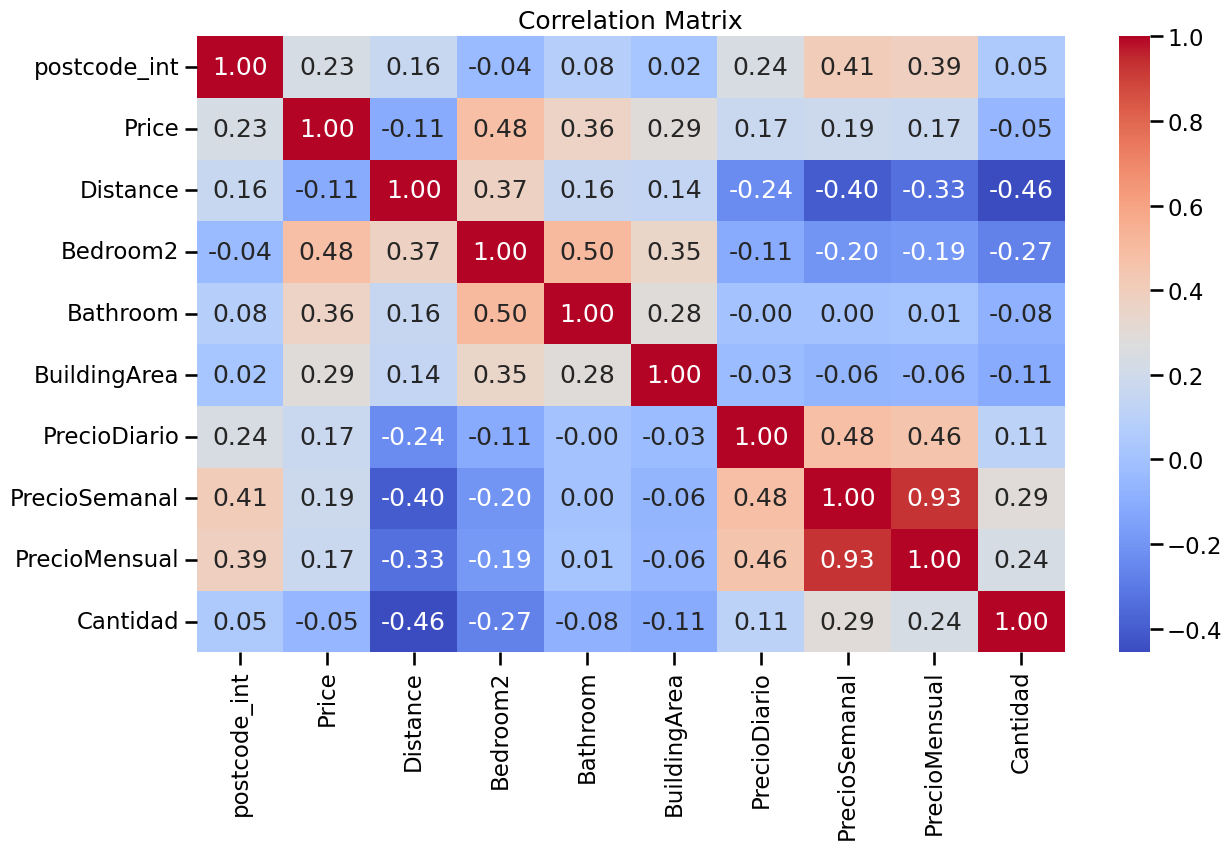

In [28]:
plt.figure(figsize=(14, 8))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [29]:
correlations = correlation_matrix.abs().unstack().sort_values(ascending=False)
high_correlations = correlations[(correlations > 0.40) & (correlations < 1.0)]

print("Correlaciones mayores a 0.50:")
for index, value in high_correlations.items():
    print(f"{index[0]} - {index[1]}: {value:.2f}")

Correlaciones mayores a 0.50:
PrecioMensual - PrecioSemanal: 0.93
PrecioSemanal - PrecioMensual: 0.93
Bathroom - Bedroom2: 0.50
Bedroom2 - Bathroom: 0.50
Price - Bedroom2: 0.48
Bedroom2 - Price: 0.48
PrecioSemanal - PrecioDiario: 0.48
PrecioDiario - PrecioSemanal: 0.48
PrecioMensual - PrecioDiario: 0.46
PrecioDiario - PrecioMensual: 0.46
Cantidad - Distance: 0.46
Distance - Cantidad: 0.46
PrecioSemanal - postcode_int: 0.41
postcode_int - PrecioSemanal: 0.41
Distance - PrecioSemanal: 0.40
PrecioSemanal - Distance: 0.40


Acá observamos las distintas correlaciones entre las variables del DataFrame, se observa por ejemplo que analizar precios semanal y precio mensual es estadisticamente similar

Analisis de la relevancia de las distintas variables en la estimacion del precio de una propiedad

#### Suburb


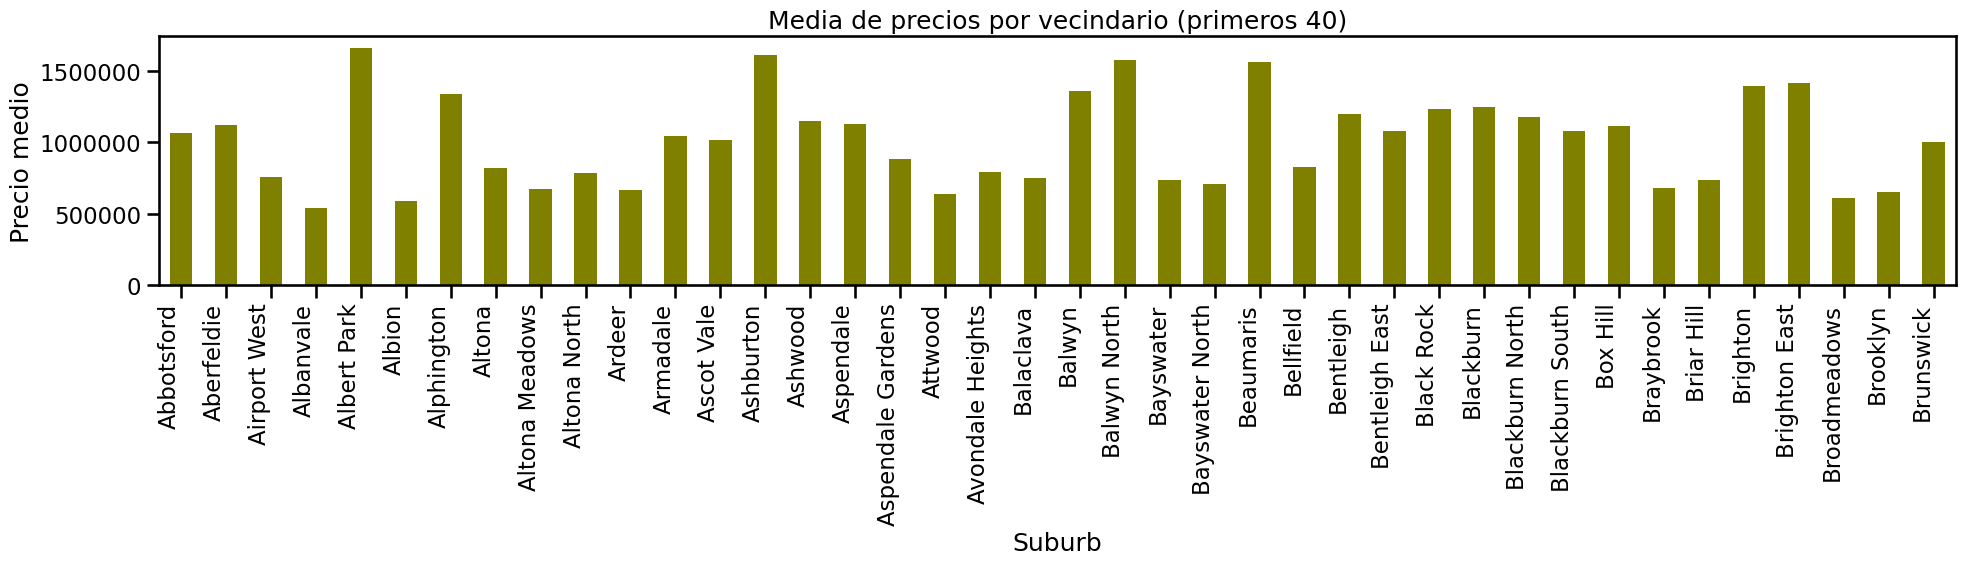

In [30]:

df_sinExtremos2 = df_sinExtremos.groupby('Suburb')['Price'].mean().head(40)

plt.figure(figsize=(20, 6))
df_sinExtremos2.plot(kind='bar', color='olive')
plt.title('Media de precios por vecindario (primeros 40)')

plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Suburb')
plt.ylabel('Precio medio')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

In [31]:
neighborhood_stats = df_sinExtremos.groupby('Suburb')['Price'].describe()

print(neighborhood_stats)

                    count          mean            std       min        25%  \
Suburb                                                                        
Abbotsford           56.0  1.060366e+06  361279.965616  300000.0   866250.0   
Aberfeldie           39.0  1.120538e+06  500996.892844  280000.0   698000.0   
Airport West         64.0  7.526875e+05  170562.805294  440000.0   659000.0   
Albanvale             6.0  5.370833e+05   78723.831631  415000.0   511125.0   
Albert Park          54.0  1.656269e+06  448712.032219  442500.0  1372500.0   
...                   ...           ...            ...       ...        ...   
Williamstown         97.0  1.187067e+06  470316.314375  310000.0   890000.0   
Williamstown North   18.0  8.409167e+05  424031.222838  285000.0   470000.0   
Windsor              59.0  9.484576e+05  529983.492652  275000.0   537500.0   
Yallambie            22.0  7.919318e+05  111476.593257  602500.0   720250.0   
Yarraville          161.0  9.725524e+05  318648.2856

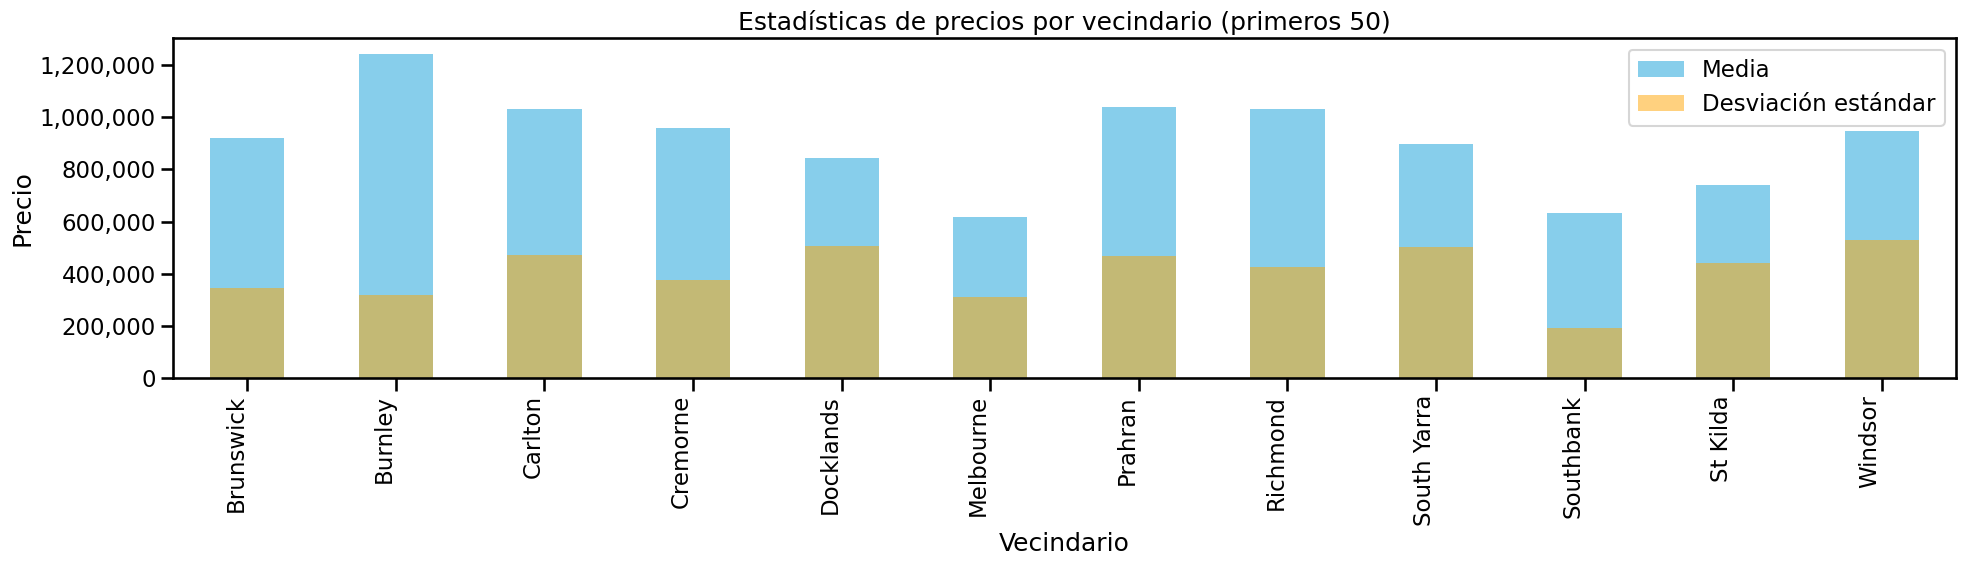

In [32]:
df_sinExtremos_top50 = df_sinExtremos.head(1000)

df_sinExtremos_grouped = df_sinExtremos_top50.groupby('Suburb')['Price'].describe()

plt.figure(figsize=(20, 6))
ax = df_sinExtremos_grouped['mean'].plot(kind='bar', color='skyblue', label='Media')
df_sinExtremos_grouped['std'].plot(kind='bar', color='orange', alpha=0.5, label='Desviación estándar', ax=ax)
plt.title('Estadísticas de precios por vecindario (primeros 50)')
plt.xlabel('Vecindario')

ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.ylabel('Precio')
plt.legend()
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

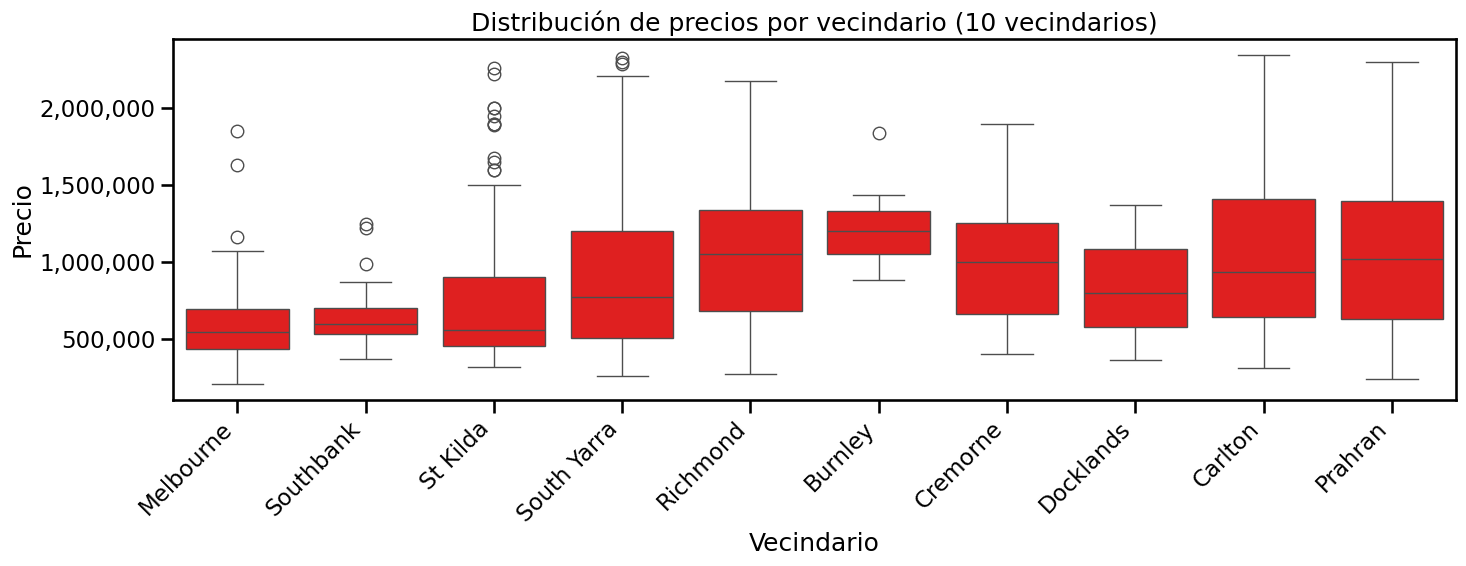

In [33]:
suburbs_to_plot = df_sinExtremos['Suburb'].unique()[:10]
df_filtered = df_sinExtremos[df_sinExtremos['Suburb'].isin(suburbs_to_plot)]


plt.figure(figsize=(15, 6))
ax = sb.boxplot(x='Suburb', y='Price', data=df_filtered, color='red')


ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.title('Distribución de precios por vecindario (10 vecindarios)')
plt.xlabel('Vecindario')
plt.ylabel('Precio')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


De éste analisis concluimos que existen suburbios con poca dispercion de datos respecto al precio por lo que resultaria una buena variable dentro del analisis estimativo del precio de una propiedad

#### Regionname

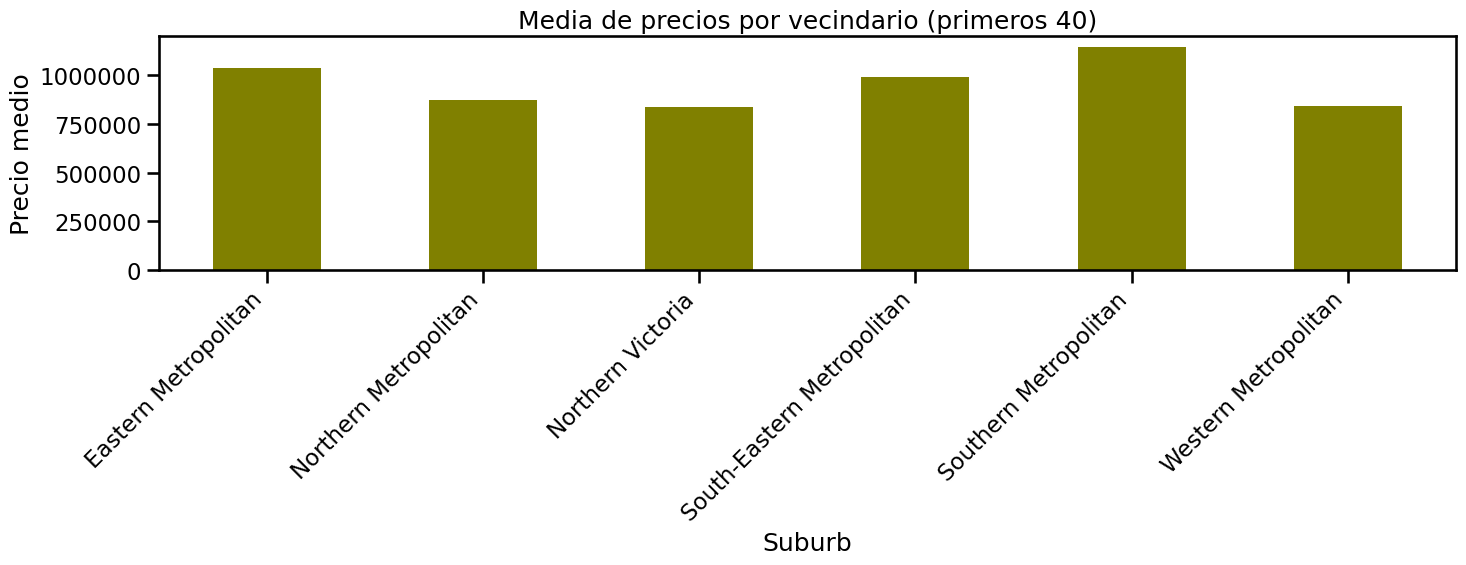

In [34]:
df_sinExtremos2 = df_sinExtremos.groupby('Regionname')['Price'].mean().head(40)

plt.figure(figsize=(15, 6))
df_sinExtremos2.plot(kind='bar', color='olive')
plt.title('Media de precios por vecindario (primeros 40)')

plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Suburb')
plt.ylabel('Precio medio')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [35]:
neighborhood_stats = df_sinExtremos.groupby('Regionname')['Price'].describe()

print(neighborhood_stats)

                             count          mean            std       min  \
Regionname                                                                  
Eastern Metropolitan        1267.0  1.037171e+06  374091.467021  288000.0   
Northern Metropolitan       3737.0  8.713814e+05  381401.058541  145000.0   
Northern Victoria              6.0  8.365000e+05  138203.834968  621000.0   
South-Eastern Metropolitan   241.0  9.914415e+05  286127.754833  309000.0   
Southern Metropolitan       4027.0  1.141717e+06  527877.907010  131000.0   
Western Metropolitan        2775.0  8.419104e+05  342282.323207   85000.0   

                                 25%        50%        75%        max  
Regionname                                                             
Eastern Metropolitan        755000.0   980000.0  1277500.0  2350000.0  
Northern Metropolitan       600000.0   800000.0  1080000.0  2350000.0  
Northern Victoria           762500.0   856500.0   937000.0   990000.0  
South-Eastern Metropoli

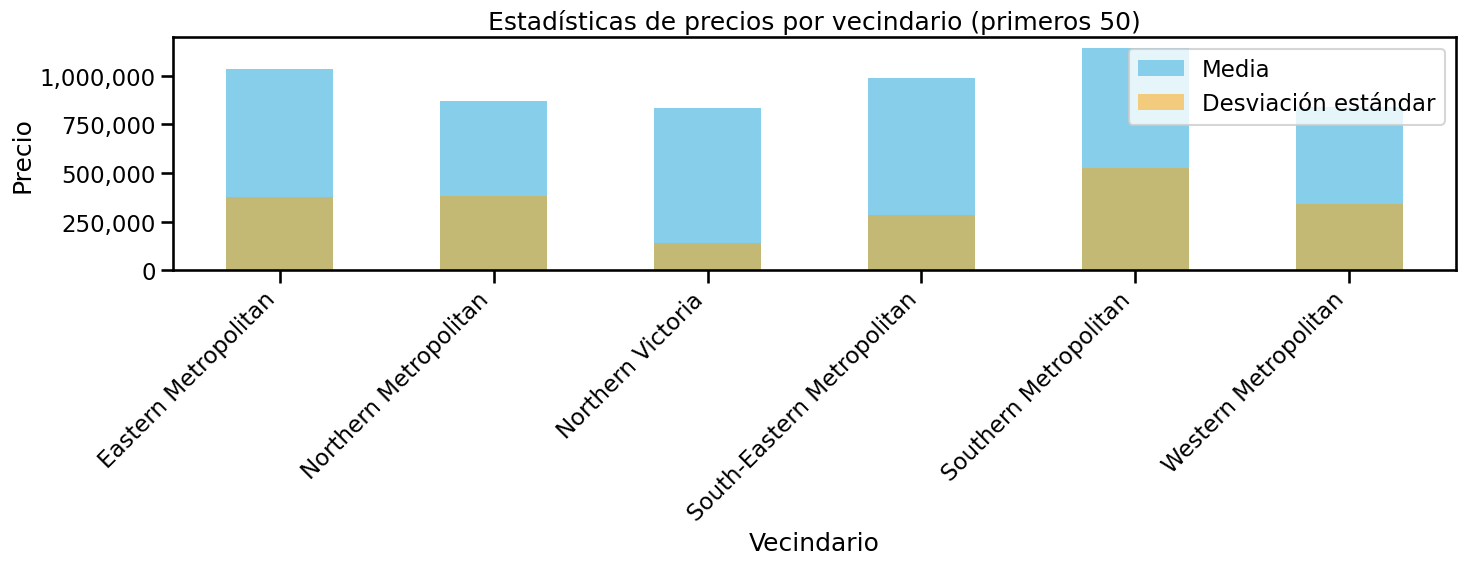

In [36]:
from matplotlib.ticker import FuncFormatter


df_sinExtremos_top50 = df_sinExtremos


df_sinExtremos_grouped = df_sinExtremos_top50.groupby('Regionname')['Price'].describe()


plt.figure(figsize=(15, 6))
ax = df_sinExtremos_grouped['mean'].plot(kind='bar', color='skyblue', label='Media')
df_sinExtremos_grouped['std'].plot(kind='bar', color='orange', alpha=0.5, label='Desviación estándar', ax=ax)
plt.title('Estadísticas de precios por vecindario (primeros 50)')
plt.xlabel('Vecindario')


ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.ylabel('Precio')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

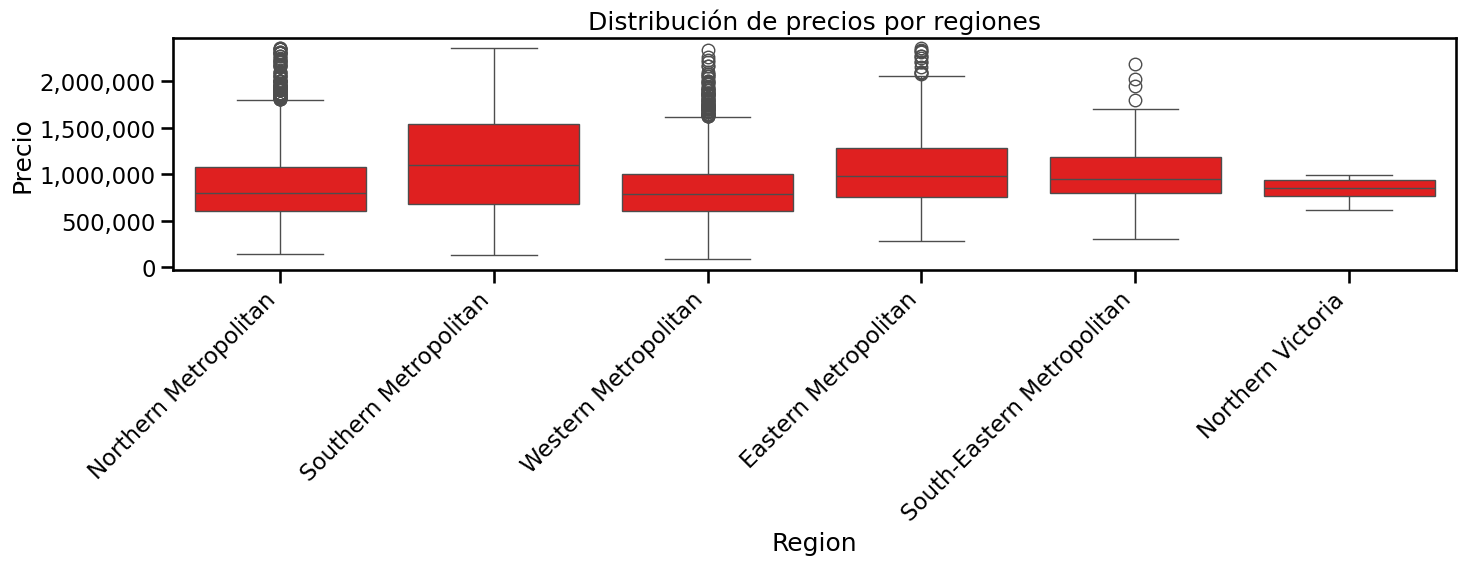

In [37]:

suburbs_to_plot = df_sinExtremos['Regionname'].unique()[:10]
df_filtered = df_sinExtremos[df_sinExtremos['Regionname'].isin(suburbs_to_plot)]


plt.figure(figsize=(15, 6))
ax = sb.boxplot(x='Regionname', y='Price', data=df_filtered, color='red')  # palette='Set3')


ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.title('Distribución de precios por regiones')
plt.xlabel('Region')
plt.ylabel('Precio')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Se puede observar que dentro de las diferentes regiones analizadas, el precio medio de una propiedad tiene una baja distribucion. En particular, en la region Northern Victoria vemos que la distribucionb de datos es bastante uniforme

#### BuildingArea

C:\Users\juanc\AppData\Local\Temp\ipykernel_12160\3335692860.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_sinExtremos_grouped = df_sinExtremos_top50.groupby('BuildingArea_binned')['Price'].describe()


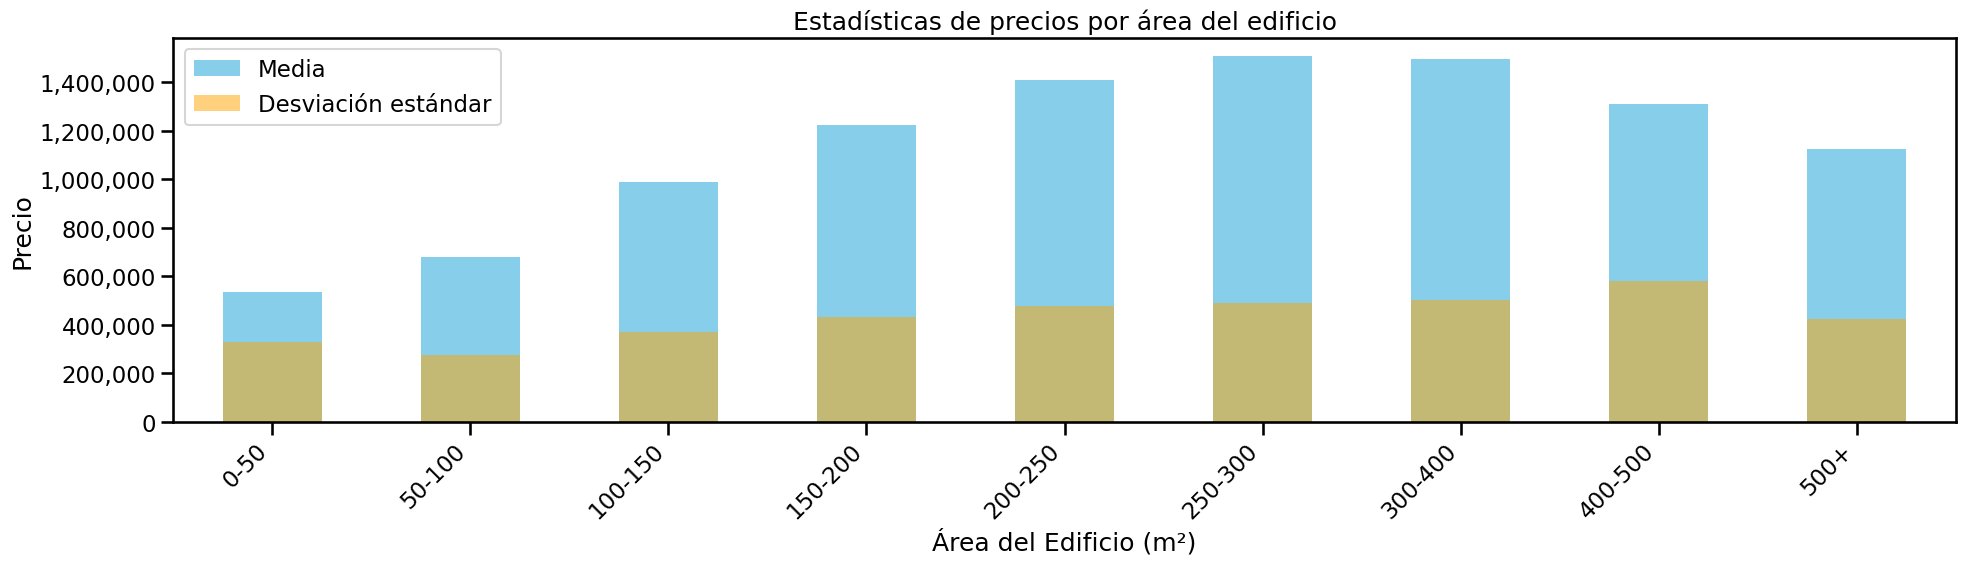

In [38]:
df_sinExtremos_top50 = df_sinExtremos

bins = [0, 50, 100, 150, 200, 250, 300, 400, 500, float('inf')]
labels = ['0-50', '50-100', '100-150', '150-200', '200-250', '250-300', '300-400', '400-500', '500+']

df_sinExtremos_top50['BuildingArea_binned'] = pd.cut(df_sinExtremos_top50['BuildingArea'], bins=bins, labels=labels)
df_sinExtremos_grouped = df_sinExtremos_top50.groupby('BuildingArea_binned')['Price'].describe()


plt.figure(figsize=(20, 6))
ax = df_sinExtremos_grouped['mean'].plot(kind='bar', color='skyblue', label='Media')

df_sinExtremos_grouped['std'].plot(kind='bar', color='orange', alpha=0.5, label='Desviación estándar', ax=ax)
plt.title('Estadísticas de precios por área del edificio')
plt.xlabel('Área del Edificio (m²)')
ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.ylabel('Precio')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


plt.show()

C:\Users\juanc\AppData\Local\Temp\ipykernel_12160\477785821.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sb.boxplot(x='BuildingArea_binned', y='Price', data=df_filtered, palette='Set3')


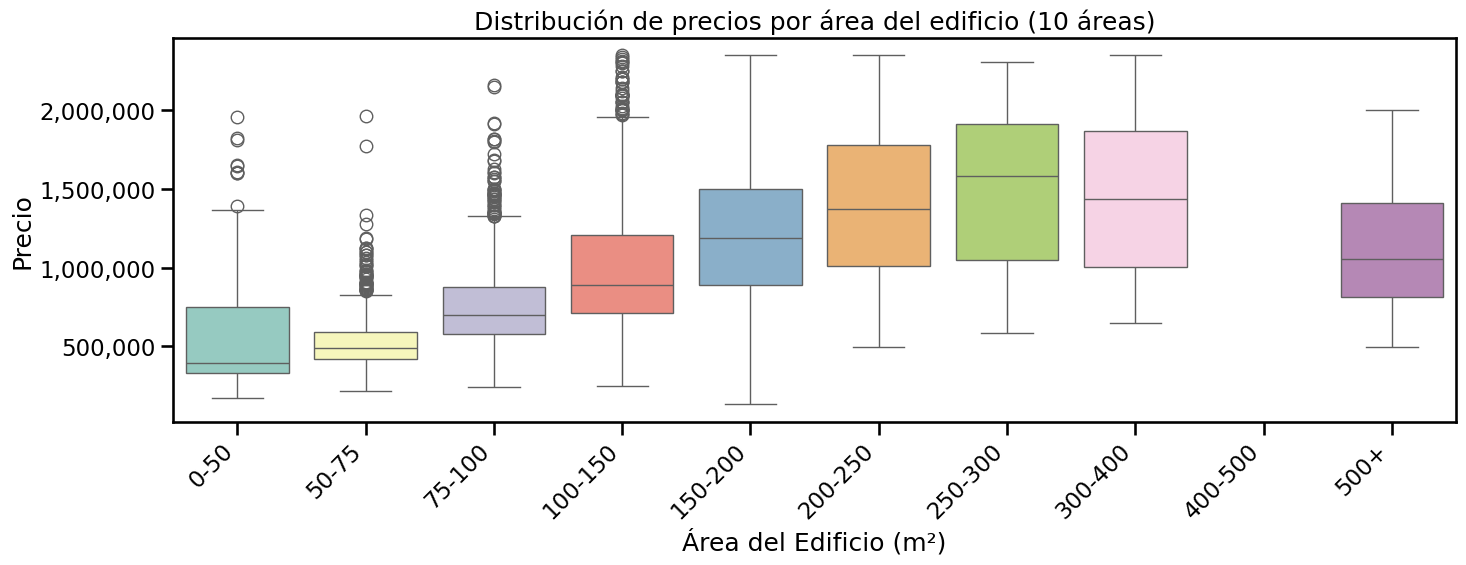

In [39]:

bins = [0, 50, 75, 100, 150, 200, 250, 300, 400, 500, float('inf')]
labels = ['0-50','50-75', '75-100', '100-150', '150-200', '200-250', '250-300', '300-400', '400-500', '500+']

df_sinExtremos['BuildingArea_binned'] = pd.cut(df_sinExtremos['BuildingArea'], bins=bins, labels=labels, right=False)

building_areas_to_plot = df_sinExtremos['BuildingArea_binned'].unique()[:10]
df_filtered = df_sinExtremos[df_sinExtremos['BuildingArea_binned'].isin(building_areas_to_plot)]


plt.figure(figsize=(15, 6))
ax = sb.boxplot(x='BuildingArea_binned', y='Price', data=df_filtered, palette='Set3')

ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.title('Distribución de precios por área del edificio (10 áreas)')
plt.xlabel('Área del Edificio (m²)')
plt.ylabel('Precio')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Vemos que la media de precios va aumentando segun el area contruida lo cual es esperable y dentro de cada intervalo vemos que la distribucion de datos es variada siendo el intervalo de 50 a 100mts2 el mas distribuido. Consideramos que el area del edificio es una variable relevante en el analisis y aporta valor significativo a la estimacion del precio

#### Columnas seleccionadas:

- *Price*: Esta es la variable objetivo que queremos predecir.
- *Bedroom2*: El número de habitaciones es un factor importante que influye en el valor de una propiedad.
- *Bathroom*: Similar al número de habitaciones, el número de baños también es relevante.
- *BuildingArea*: El tamaño de la construcción es directamente proporcional al valor de la propiedad.
- *Suburb*: Cuenta con poca dispercion de precios

#### Columnas no seleccionadas:

- *postcode_int*: La información del código postal puede ser redundante si ya estamos utilizando Regionname.
- *Regionname*: Proporciona información sobre la ubicación general de la propiedad, lo cual es crucial para la predicción del valor pero en este caso la variedad de precios es muy uniforme por lo que no seria relevante en este caso.

### Parte 2

In [40]:
airbnb_agrupacion = airbnb_df.groupby('zipcode_int').agg({
    'price': ['mean', 'median', 'std'],
    'weekly_price': ['mean', 'median', 'std'],
    'monthly_price': ['mean', 'median', 'std'],
    'zipcode': 'count'
}).reset_index()

airbnb_agrupacion[:]

,,mean,median,std,mean,median,std,mean,median,std,count
0,0,159.630137,120.0,199.821576,906.083333,780.0,589.205391,3179.666667,3300.0,2149.285521,4
1,2010,40.000000,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,2134,50.000000,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,2582,104.000000,104.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,3000,150.504307,129.0,189.529766,918.738956,857.0,436.656145,3407.204651,3469.0,1342.229880,3367
...,...,...,...,...,...,...,...,...,...,...,...
243,7367,230.000000,230.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
244,8938,296.000000,296.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
245,9004,226.000000,226.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
246,9540,245.000000,245.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [41]:
airbnb_agrupacion.columns = [
    'zipcode', 'promedio_precio_diario', 'mediana_precio_diario', 'desviacion_precio_diario',
    'promedio_precio_semanal', 'mediana_precio_semanal', 'desviacion_precio_semanal',
    'promedio_precio_mensual', 'mediana_precio_mensual', 'desviacion_precio_mensual',
    'property_count'
]

df_datos_adicionales_airbnb = df_sinExtremos.merge(
    airbnb_agrupacion,
    left_on='postcode_int',
    right_on='zipcode',
    how='left'
)

df_datos_adicionales_airbnb[:]

,postcode_int,Suburb,Price,Distance,Regionname,Bedroom2,Bathroom,BuildingArea,PrecioDiario,PrecioSemanal,...,promedio_precio_diario,mediana_precio_diario,desviacion_precio_diario,promedio_precio_semanal,mediana_precio_semanal,desviacion_precio_semanal,promedio_precio_mensual,mediana_precio_mensual,desviacion_precio_mensual,property_count
0,3000,Melbourne,427000.0,2.8,Northern Metropolitan,1.0,1.0,NaN,150.504307,918.738956,...,150.504307,129.0,189.529766,918.738956,857.0,436.656145,3407.204651,3469.0,1342.22988,3367.0
1,3000,Melbourne,1160500.0,2.8,Northern Metropolitan,2.0,2.0,NaN,150.504307,918.738956,...,150.504307,129.0,189.529766,918.738956,857.0,436.656145,3407.204651,3469.0,1342.22988,3367.0
2,3000,Melbourne,780000.0,2.8,Northern Metropolitan,2.0,2.0,85.0,150.504307,918.738956,...,150.504307,129.0,189.529766,918.738956,857.0,436.656145,3407.204651,3469.0,1342.22988,3367.0
3,3000,Melbourne,535000.0,2.8,Northern Metropolitan,2.0,1.0,84.0,150.504307,918.738956,...,150.504307,129.0,189.529766,918.738956,857.0,436.656145,3407.204651,3469.0,1342.22988,3367.0
4,3000,Melbourne,450000.0,2.8,Northern Metropolitan,2.0,1.0,55.0,150.504307,918.738956,...,150.504307,129.0,189.529766,918.738956,857.0,436.656145,3407.204651,3469.0,1342.22988,3367.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12048,3061,Campbellfield,445000.0,14.5,Northern Metropolitan,3.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12049,3022,Ardeer,645000.0,12.8,Western Metropolitan,3.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12050,3022,Ardeer,627000.0,12.8,Western Metropolitan,3.0,1.0,102.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12051,3022,Ardeer,730000.0,12.8,Western Metropolitan,3.0,2.0,112.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
min_registros = 50

zipcodes_relevantes = df_datos_adicionales_airbnb['zipcode'].value_counts()[df_datos_adicionales_airbnb['zipcode'].value_counts() >= min_registros].index

datos_curados_df = df_datos_adicionales_airbnb[df_datos_adicionales_airbnb['zipcode'].isin(zipcodes_relevantes)]

#### Otras variables posibles:

- *Coordenadas geográficas* (latitude, longitude): Permiten realizar análisis espaciales avanzados y calcular la proximidad a puntos de interés como escuelas, parques y transporte público.

- *Tipo de propiedad* (property_type): Diferentes tipos de propiedades (casas, departamentos, locales comerciales) pueden tener diferentes valores de mercado y tendencias.

## Ejercicio 3:

Crear y guardar un nuevo conjunto de datos con todas las transformaciones realizadas anteriormente.

In [43]:
datos_curados_df.to_sql(
    'datos_curados',
    con = engine,
    if_exists='replace',
    index=False
)

10567

## Ejercicios opcionales:

1. Armar un script en python (archivo .py) [ETL](https://towardsdatascience.com/what-to-log-from-python-etl-pipelines-9e0cfe29950e) que corra los pasos de extraccion, transformacion y carga, armando una funcion para cada etapa del proceso y luego un main que corra todos los pasos requeridos.

2. Armar un DAG en Apache Airflow que corra el ETL. (https://airflow.apache.org/docs/apache-airflow/stable/tutorial.html)